In [51]:
import sklearn as sk
import pandas as pd
import numpy as np
np.Inf = np.inf
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
import seaborn as sns
import math

## Import Data

In [52]:
df = pd.read_csv('weatherClassificationData.csv')
df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


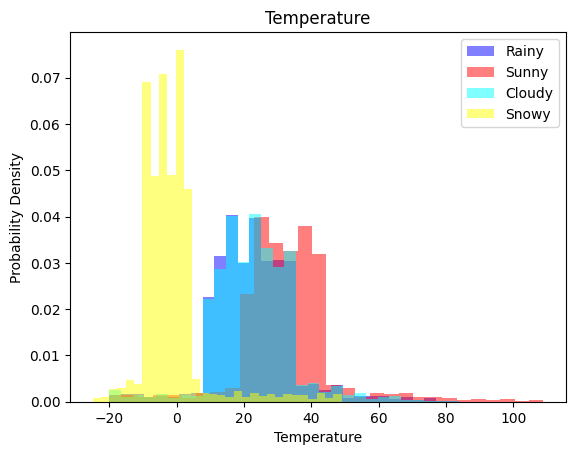

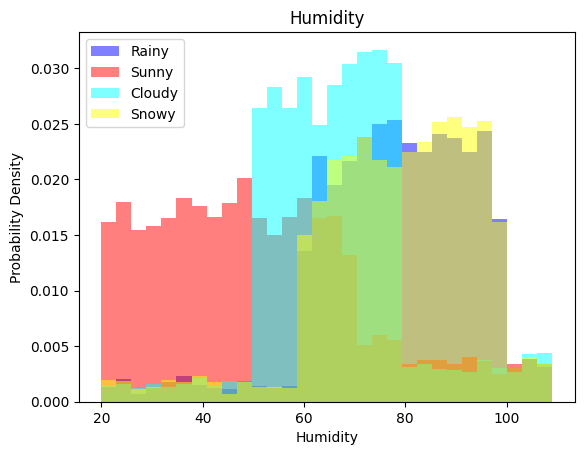

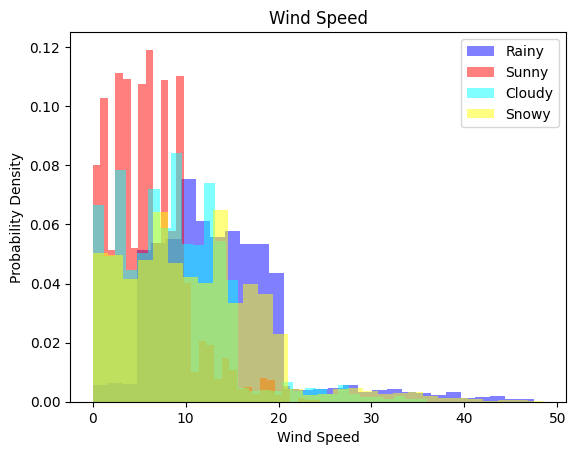

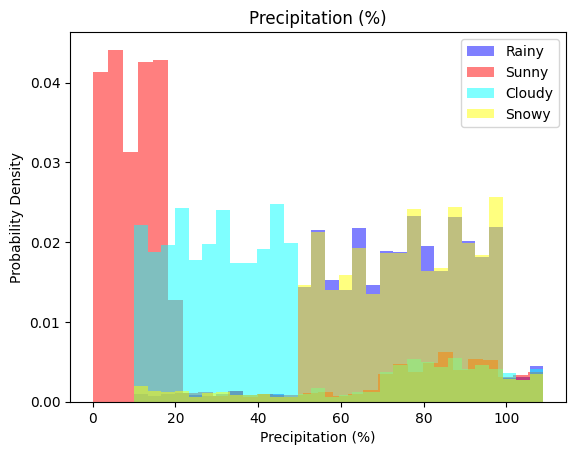

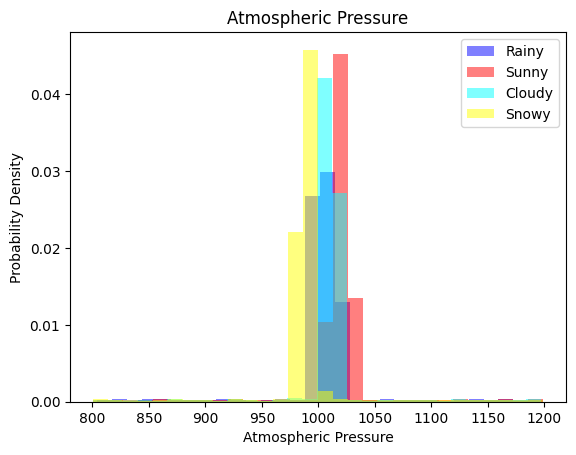

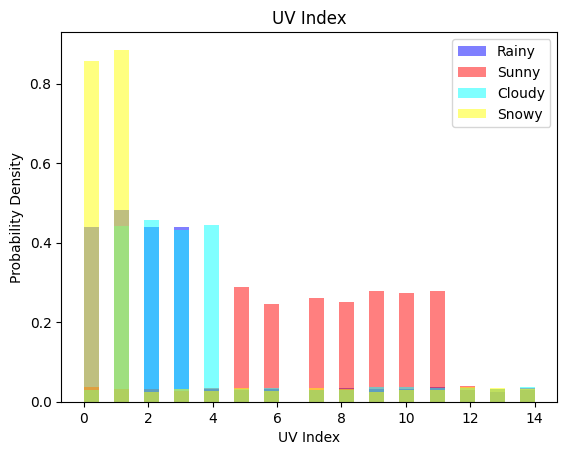

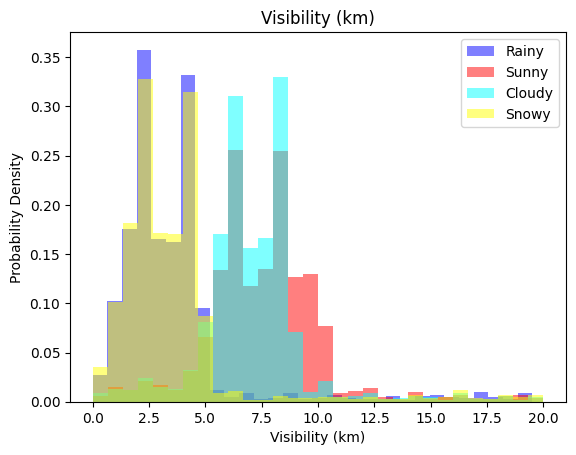

In [53]:
categories = df.select_dtypes(include='object')

for col in df.columns[:-1]:
  if col not in  categories[:-2]:
    plt.hist(df[df["Weather Type"]=="Rainy"][col], color='blue', label='Rainy', alpha=0.5, density=True, bins = 30)
    plt.hist(df[df["Weather Type"]=="Sunny"][col], color='red', label='Sunny', alpha=0.5, density=True, bins = 30)
    plt.hist(df[df["Weather Type"]=="Cloudy"][col], color='cyan', label='Cloudy', alpha=0.5, density=True, bins = 30)
    plt.hist(df[df["Weather Type"]=="Snowy"][col], color='yellow', label='Snowy', alpha=0.5, density=True, bins = 30)
    plt.title(col)
    plt.ylabel("Probability Density")
    plt.xlabel(col)
    plt.legend()
    plt.show()

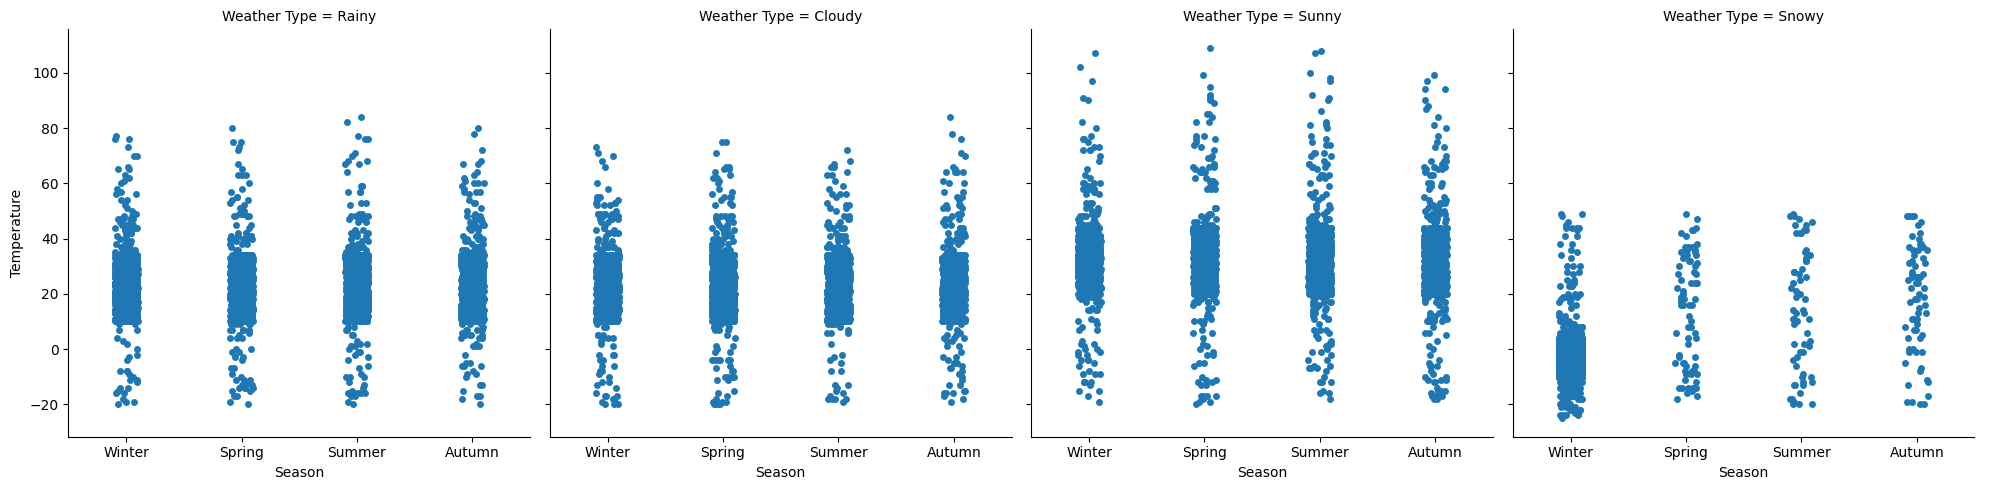

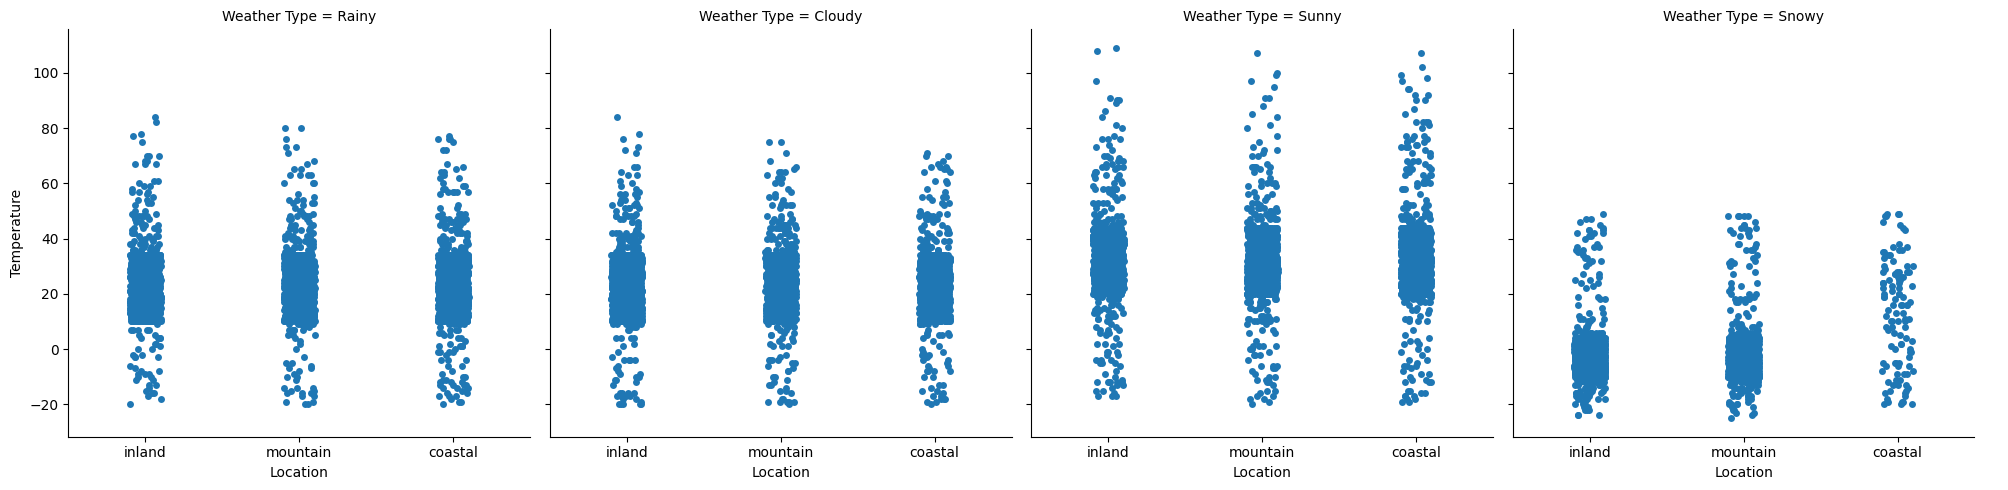

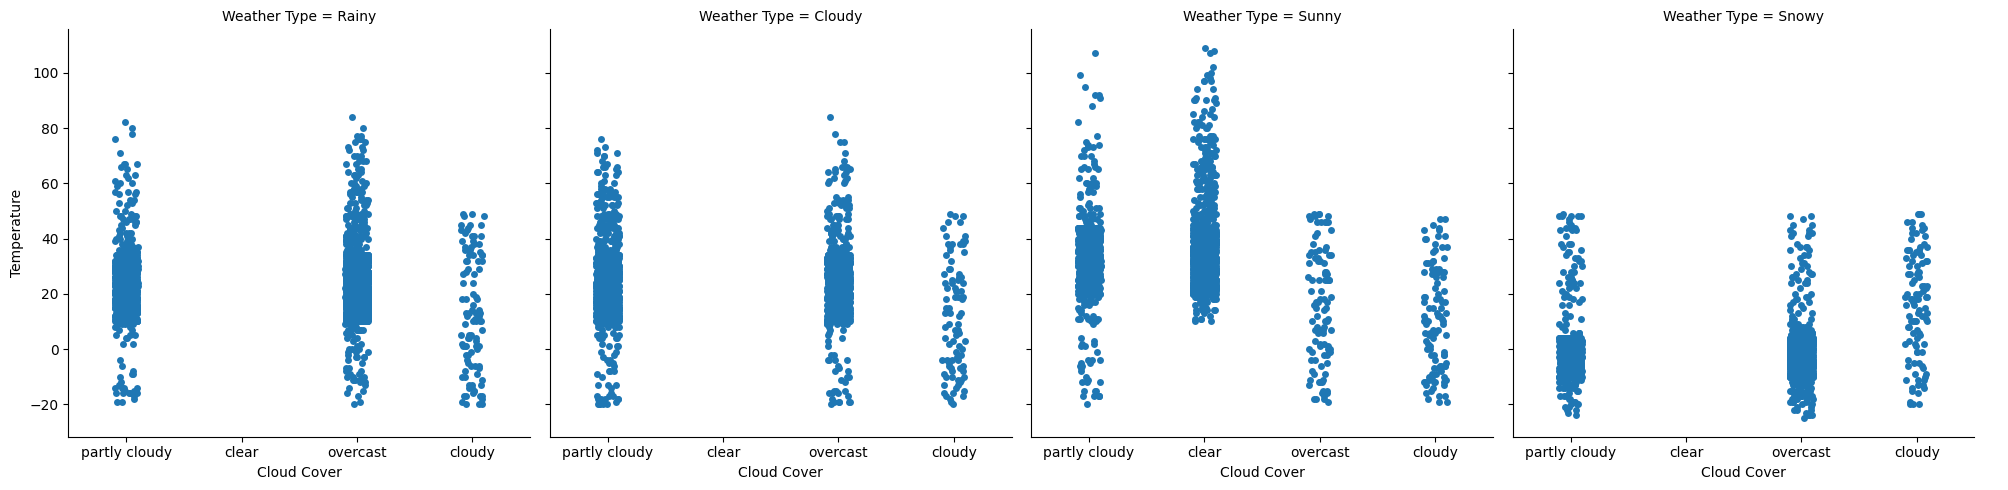

In [54]:
sns.catplot(data=df, x="Season", y="Temperature", col="Weather Type")
sns.catplot(data=df, x="Location", y="Temperature", col="Weather Type")
sns.catplot(data=df, x="Cloud Cover", y="Temperature", col="Weather Type")

## Inferences
It is pretty apparent that snowy weather has lower temperature.
Sunny weather usually means less humidity and more probably windy-ness.
Sunny weather has lower precipitation, but rainy and snowy weather has higher precipitation.
Snowy weather generally has lesser atmospheric pressure, but it's higher for sunny weather.
Visibility is higher for sunny weather, but lower for rainy and snowy weather

# Correlation Matrix

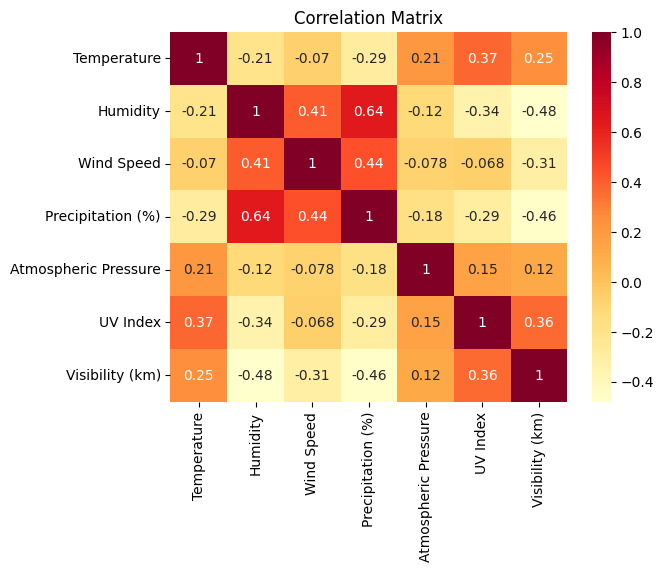

In [55]:
numerical_df = df.select_dtypes(include=["int", "float"])
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True, cmap ='YlOrRd')

plt.title('Correlation Matrix')
plt.show()

## Inferences of the correlation matrix
We can see that humidity and precipitation have a high correlation.
Also, wind speed and precipitation have a good correlation.

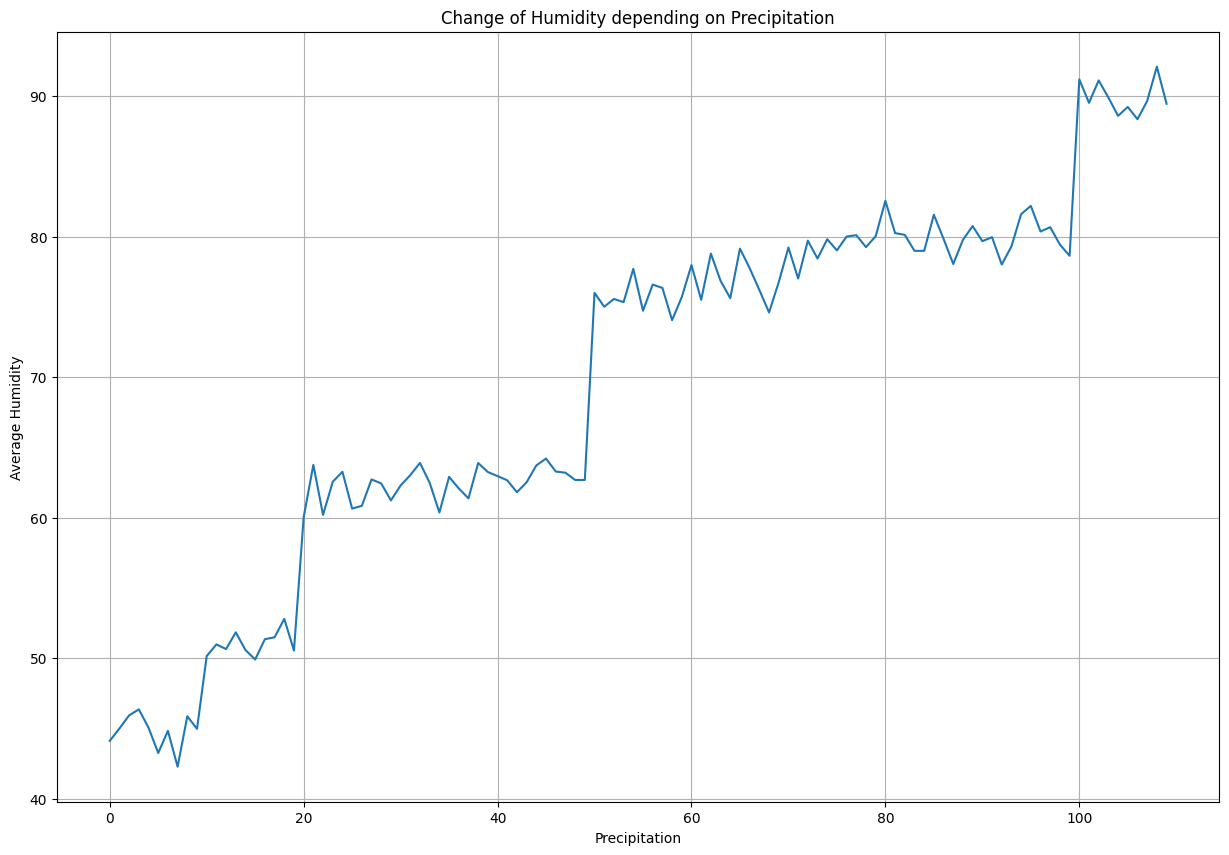

In [56]:
plt.figure(figsize=(15, 10))

precipitation_on_humidity = df.groupby("Precipitation (%)")["Humidity"].mean()

precipitation_on_humidity.plot(kind="line")

plt.title('Change of Humidity depending on Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Average Humidity')
plt.grid(True)

plt.show()

## Inference from the Humidity/Precipitation graph
Generally it seems that higher average precipitation implies higher average humidity.

# Data Preprocessing

In [57]:
print(df.duplicated().sum())

0


In [58]:
df.describe()

,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km)
count,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000,13200.000000
mean,19.127576,68.710833,9.832197,53.644394,1005.827896,4.005758,5.462917
std,17.386327,20.194248,6.908704,31.946541,37.199589,3.856600,3.371499
min,-25.000000,20.000000,0.000000,0.000000,800.120000,0.000000,0.000000
25%,4.000000,57.000000,5.000000,19.000000,994.800000,1.000000,3.000000
50%,21.000000,70.000000,9.000000,58.000000,1007.650000,3.000000,5.000000
75%,31.000000,84.000000,13.500000,82.000000,1016.772500,7.000000,7.500000
max,109.000000,109.000000,48.500000,109.000000,1199.210000,14.000000,20.000000


In [59]:
from sklearn.preprocessing import LabelEncoder, StandardScaler

encoder = LabelEncoder()


for col in categories:
    df[col] = encoder.fit_transform(df[col])

df.head()

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,3,1010.82,2,3,3.5,1,1
1,39.0,96,8.5,71.0,3,1011.43,7,1,10.0,1,0
2,30.0,64,7.0,16.0,0,1018.72,5,1,5.5,2,3
3,38.0,83,1.5,82.0,0,1026.25,7,1,1.0,0,3
4,27.0,74,17.0,66.0,2,990.67,1,3,2.5,2,1


In [60]:
def scaleDataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [61]:
train, valid, test = np.split(df.sample(frac=1), [int(0.6*len(df)),int(0.8*len(df))])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/numpy/core/fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [62]:
train, X_train, y_train = scaleDataset(train, oversample=True)
valid, X_valid, y_valid = scaleDataset(valid)
test, X_test, y_test = scaleDataset(test)

## Machine Learning Training

### Naive Bayes' Model

In [63]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
nb_model = GaussianNB()
nb_model = nb_model.fit(X_train, y_train)
y_pred = nb_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8481    0.8127    0.8300       646
           1     0.8276    0.8556    0.8414       651
           2     0.9327    0.9141    0.9233       652
           3     0.8378    0.8596    0.8486       691

    accuracy                         0.8606      2640
   macro avg     0.8616    0.8605    0.8608      2640
weighted avg     0.8613    0.8606    0.8607      2640



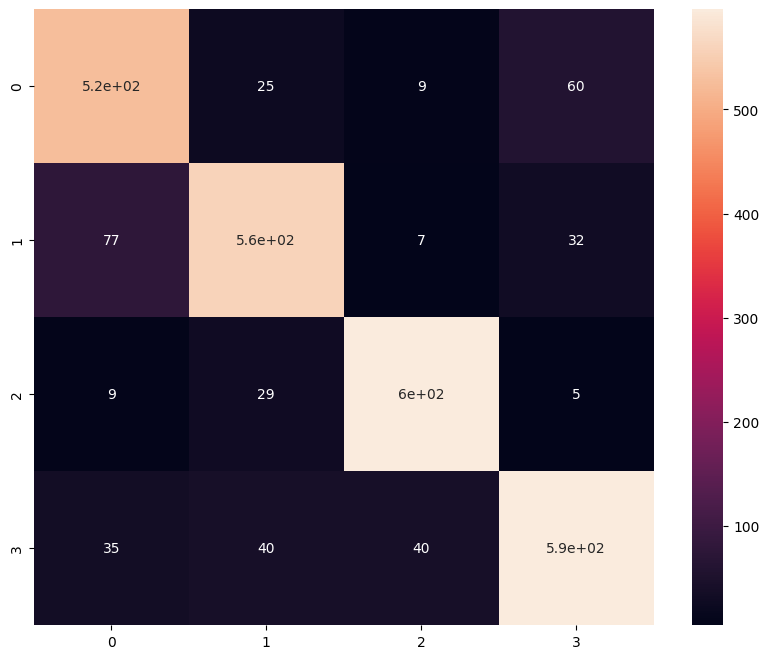

In [65]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

### Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
lg_model = LogisticRegression()
lg_model = lg_model.fit(X_train, y_train)
y_pred = lg_model.predict(X_test)
print(classification_report(y_test, y_pred, digits=4))

              precision    recall  f1-score   support

           0     0.8009    0.8344    0.8173       646
           1     0.8336    0.8618    0.8474       651
           2     0.8957    0.9218    0.9085       652
           3     0.8732    0.7873    0.8280       691

    accuracy                         0.8504      2640
   macro avg     0.8508    0.8513    0.8503      2640
weighted avg     0.8513    0.8504    0.8501      2640



### Support Vector Machines

In [67]:
from sklearn.svm import SVC
svm_model = SVC()
svm_model = svm_model.fit(X_train,y_train)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test,y_pred,digits = 4))

              precision    recall  f1-score   support

           0     0.8757    0.9056    0.8904       646
           1     0.9034    0.9048    0.9041       651
           2     0.9528    0.9279    0.9402       652
           3     0.9109    0.9030    0.9070       691

    accuracy                         0.9102      2640
   macro avg     0.9107    0.9103    0.9104      2640
weighted avg     0.9108    0.9102    0.9104      2640



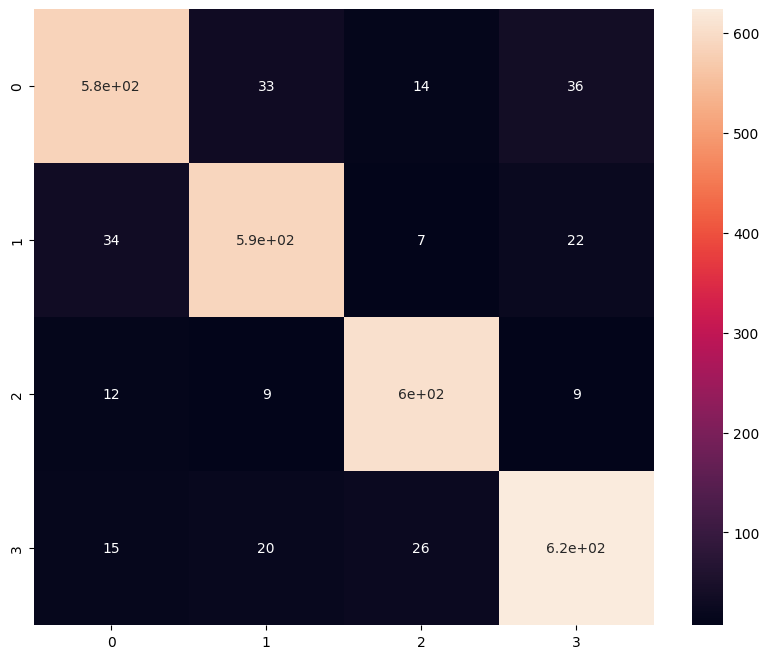

In [68]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

### Decision Trees

In [69]:
from sklearn.tree import DecisionTreeClassifier

dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)

y_pred = dt_clf.predict(X_test)

In [70]:
print(classification_report(y_pred, y_test, digits=4))

              precision    recall  f1-score   support

           0     0.8885    0.8645    0.8763       664
           1     0.8863    0.8988    0.8925       642
           2     0.9018    0.9173    0.9095       641
           3     0.9030    0.9004    0.9017       693

    accuracy                         0.8951      2640
   macro avg     0.8949    0.8952    0.8950      2640
weighted avg     0.8950    0.8951    0.8950      2640



### XGBoost

In [71]:
import xgboost as xgb

xgb_clf = xgb.XGBClassifier()

xgb_clf.fit(X_train, y_train)

y_pred = xgb_clf.predict(X_test)

In [72]:
print(classification_report(y_pred, y_test, digits=4))

              precision    recall  f1-score   support

           0     0.9056    0.8540    0.8790       685
           1     0.9063    0.8899    0.8980       663
           2     0.9294    0.9337    0.9316       649
           3     0.8625    0.9269    0.8936       643

    accuracy                         0.9004      2640
   macro avg     0.9010    0.9011    0.9006      2640
weighted avg     0.9011    0.9004    0.9003      2640



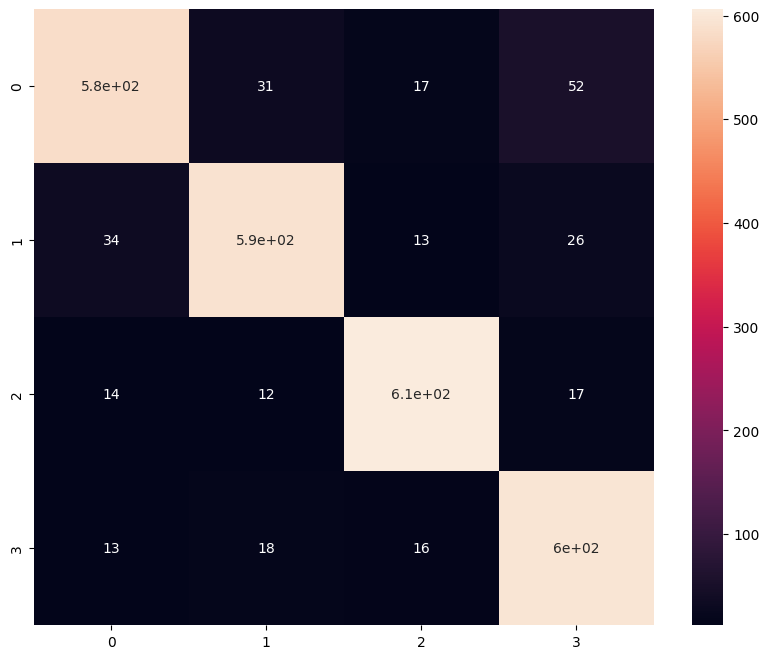

In [73]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

### Random Forest Classifier

In [74]:
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier()

rf_clf.fit(X_train, y_train)

y_pred = rf_clf.predict(X_test)

In [75]:
print(classification_report(y_pred, y_test, digits=4))

              precision    recall  f1-score   support

           0     0.9164    0.8970    0.9066       660
           1     0.9171    0.9142    0.9156       653
           2     0.9218    0.9361    0.9289       642
           3     0.9146    0.9226    0.9186       685

    accuracy                         0.9174      2640
   macro avg     0.9175    0.9175    0.9174      2640
weighted avg     0.9174    0.9174    0.9174      2640



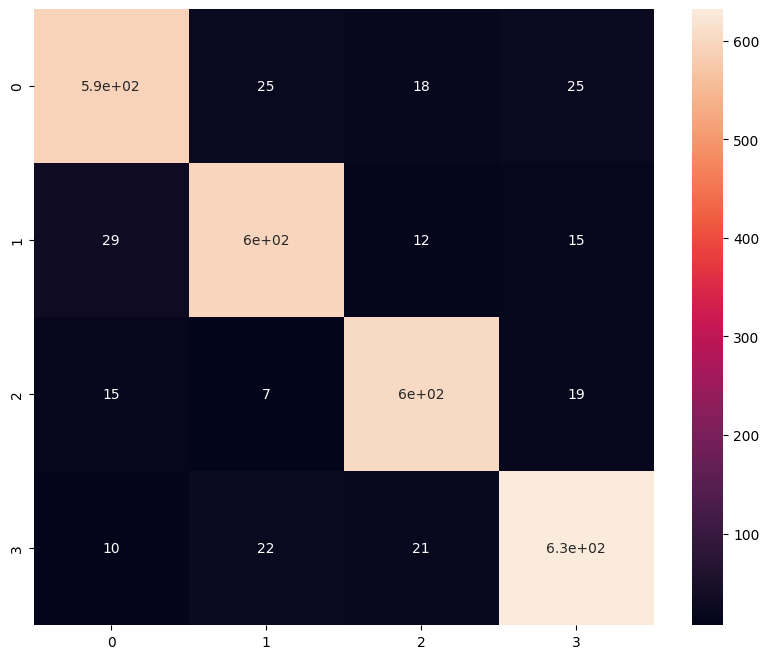

In [76]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

### Neural Networks

In [77]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.utils import to_categorical 

In [78]:
y_train = to_categorical(y_train, 4)
y_valid = to_categorical(y_valid,4)

In [79]:
def plotHistory(history):
  fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
  ax1.plot(history.history['loss'], label='loss')
  ax1.plot(history.history['val_loss'], label='val_loss')
  plt.title('Loss Over Epochs')
  ax1.set_xlabel('Epoch')
  ax1.set_ylabel('Loss over Epochs')
  ax1.grid(True)

  ax2.plot(history.history['accuracy'], label='accuracy')
  ax2.plot(history.history['val_accuracy'], label='val_accuracy')
  plt.title('Accuracy Over Epochs')
  ax2.set_xlabel('Epoch')
  ax2.set_ylabel('Accuracy')
  ax2.grid(True)

  plt.show()

In [80]:
def trainModel(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs):
  nn_model = Sequential([
      Dense(num_nodes, activation='relu', input_shape=(X_train.shape[1],)),
      Dropout(dropout_prob),
      Dense(num_nodes, activation='relu'),
      Dropout(dropout_prob),
      Dense(4, activation='softmax')
  ])

  nn_model.compile(optimizer=tf.keras.optimizers.Adam(lr), loss='CategoricalCrossentropy',
                  metrics=['accuracy'])
  early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
  reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
  history = nn_model.fit(
    X_train, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=0,
  callbacks = [early_stopping,reduce_lr])

  return nn_model, history

128 nodes, dropout 0, lr 0.01, batch size 32


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


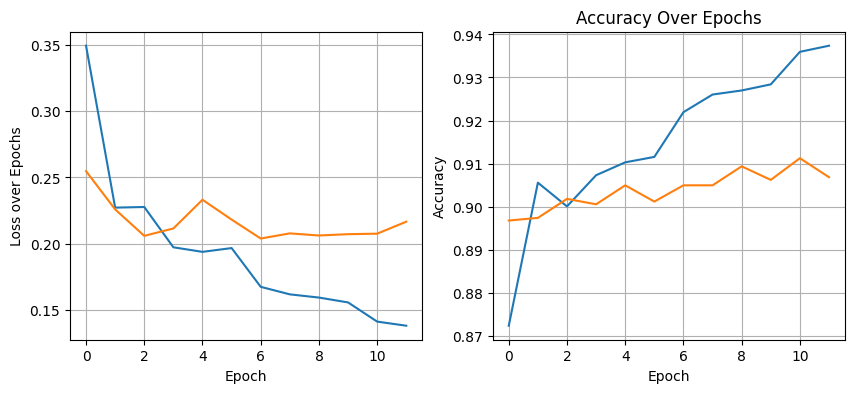

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 358us/step - accuracy: 0.9053 - loss: 0.1961
128 nodes, dropout 0, lr 0.01, batch size 64


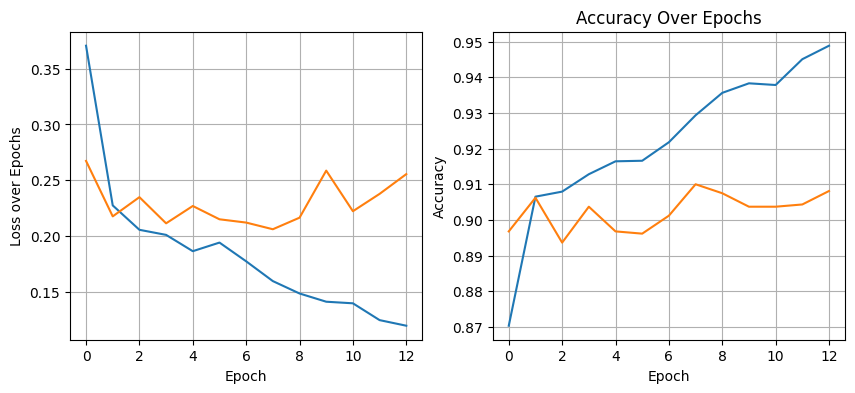

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.9106 - loss: 0.1892
128 nodes, dropout 0, lr 0.01, batch size 128


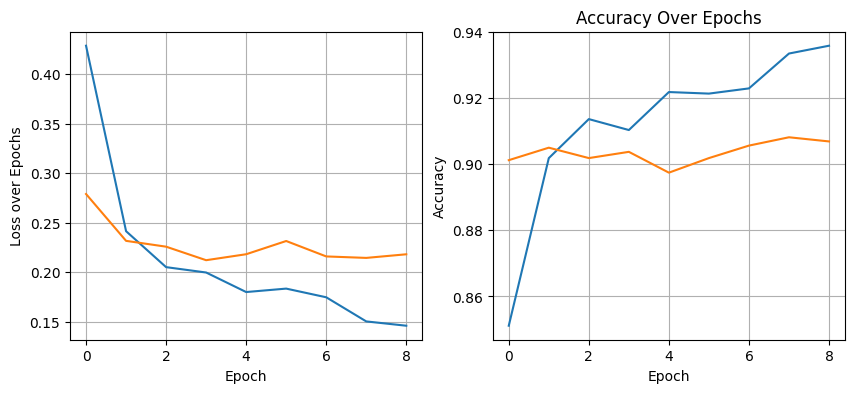

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 365us/step - accuracy: 0.9107 - loss: 0.1974
128 nodes, dropout 0, lr 0.005, batch size 32


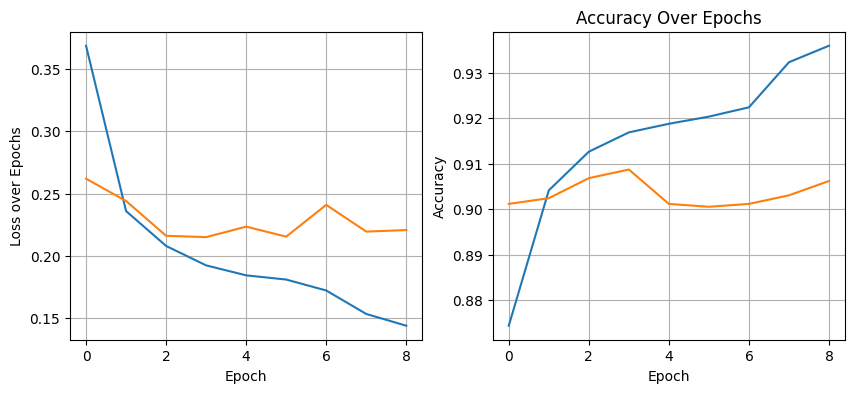

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 366us/step - accuracy: 0.9151 - loss: 0.1922
128 nodes, dropout 0, lr 0.005, batch size 64


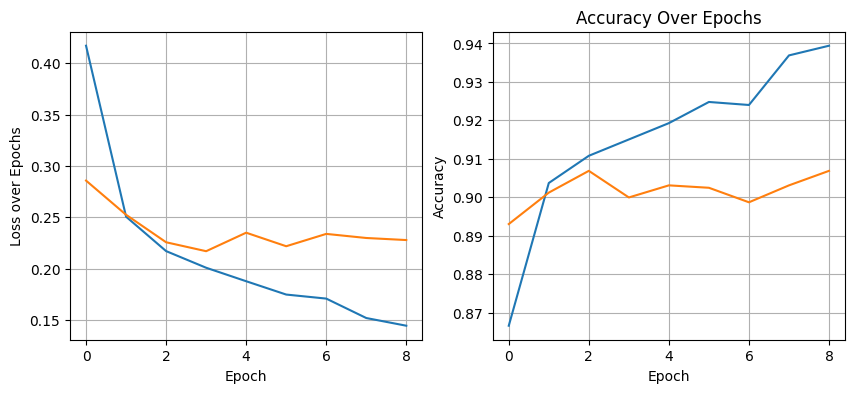

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 756us/step - accuracy: 0.9096 - loss: 0.2042
128 nodes, dropout 0, lr 0.005, batch size 128


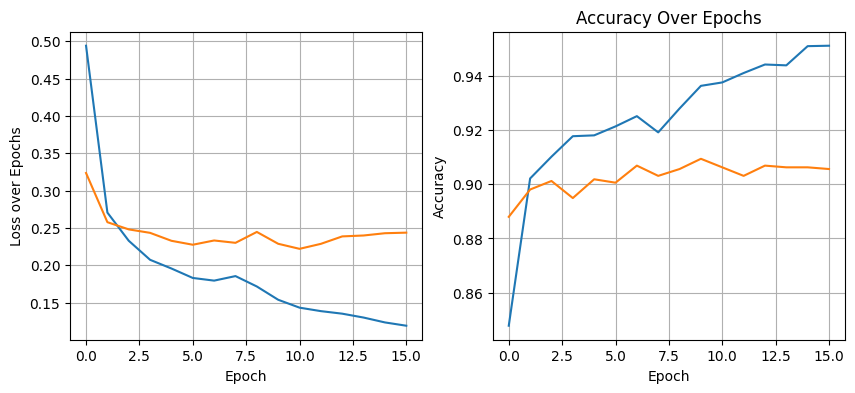

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 579us/step - accuracy: 0.9144 - loss: 0.1987
128 nodes, dropout 0, lr 0.001, batch size 32


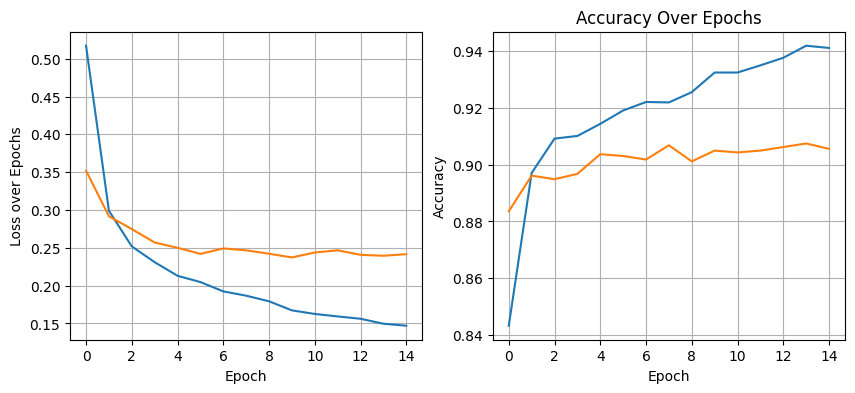

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.9118 - loss: 0.2060
128 nodes, dropout 0, lr 0.001, batch size 64


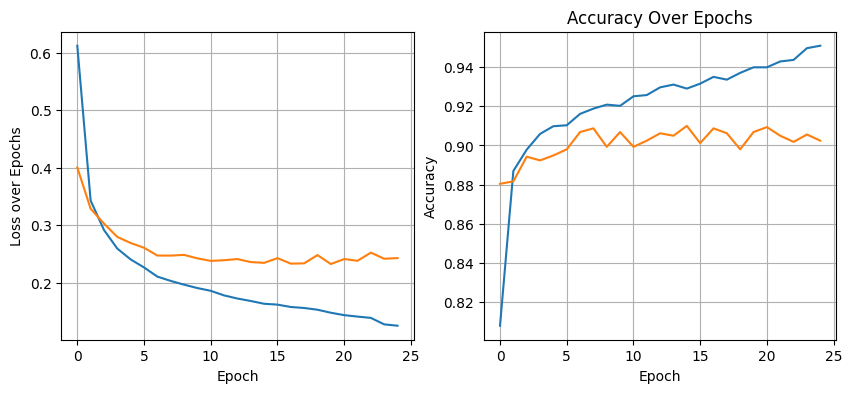

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 340us/step - accuracy: 0.9057 - loss: 0.2186
128 nodes, dropout 0, lr 0.001, batch size 128


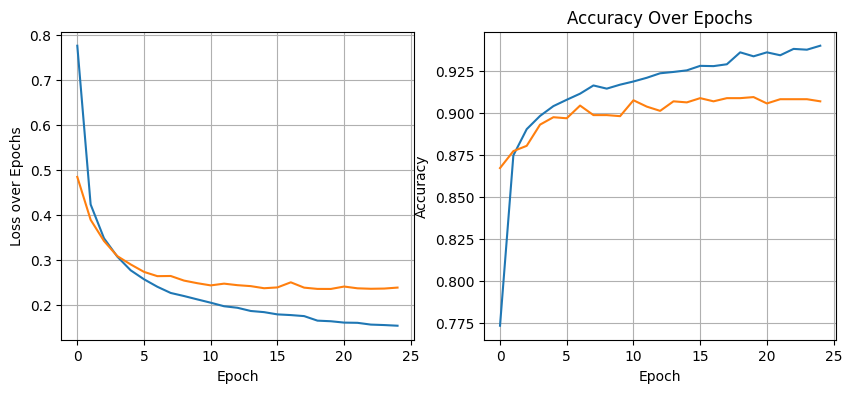

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.9094 - loss: 0.2210
128 nodes, dropout 0.2, lr 0.01, batch size 32


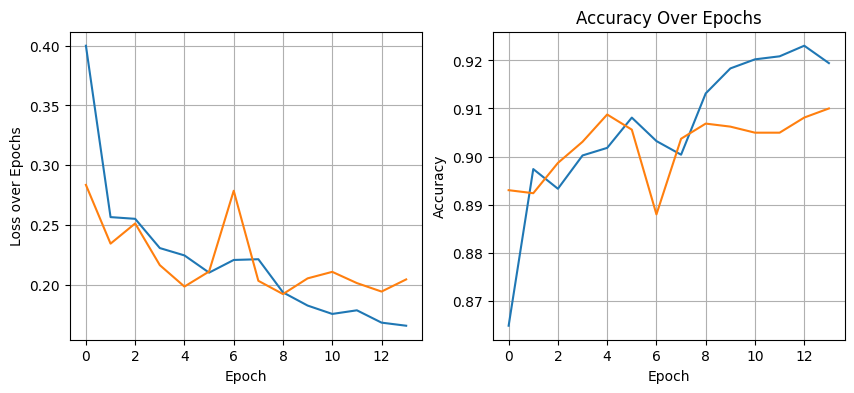

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 349us/step - accuracy: 0.9097 - loss: 0.1820
128 nodes, dropout 0.2, lr 0.01, batch size 64


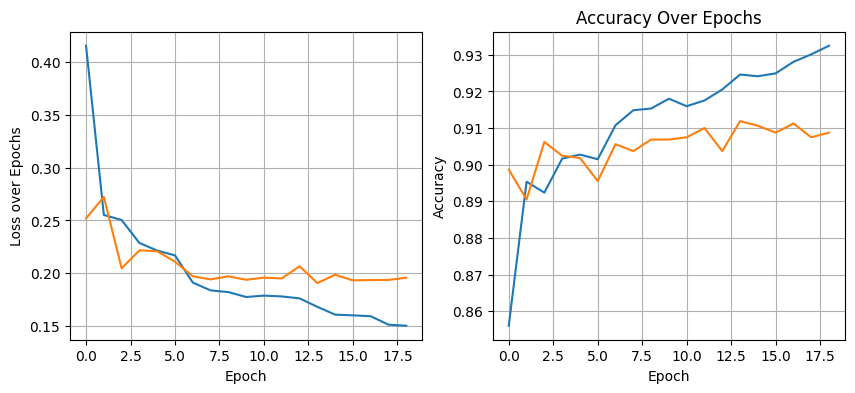

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 330us/step - accuracy: 0.9083 - loss: 0.1784
128 nodes, dropout 0.2, lr 0.01, batch size 128


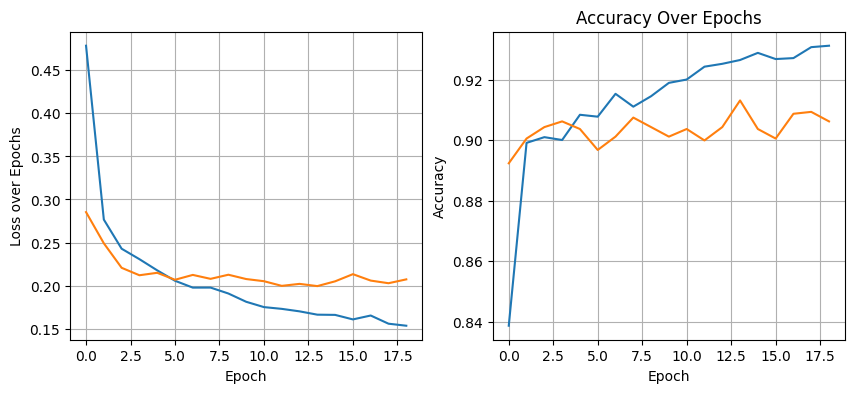

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 344us/step - accuracy: 0.9082 - loss: 0.1834
128 nodes, dropout 0.2, lr 0.005, batch size 32


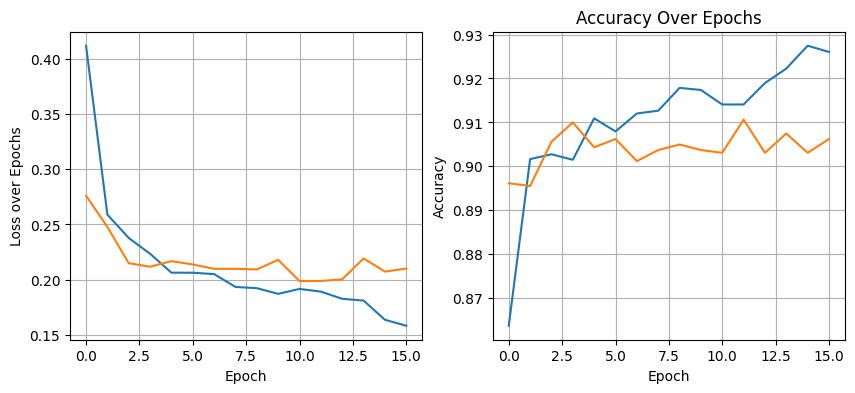

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - accuracy: 0.9086 - loss: 0.1924
128 nodes, dropout 0.2, lr 0.005, batch size 64


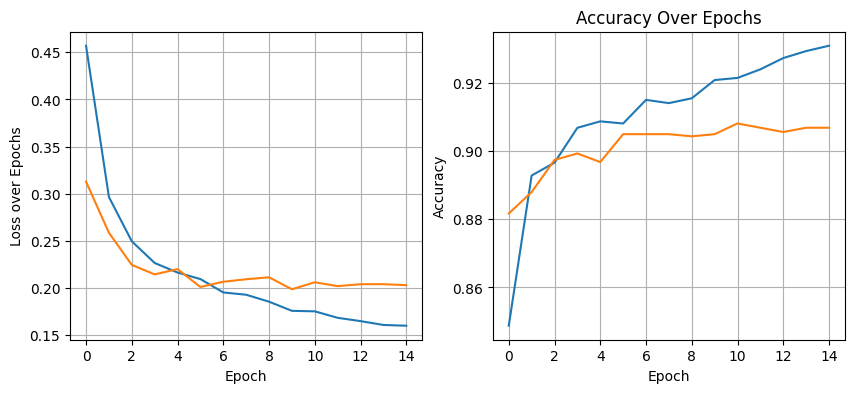

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 350us/step - accuracy: 0.9129 - loss: 0.1788
128 nodes, dropout 0.2, lr 0.005, batch size 128


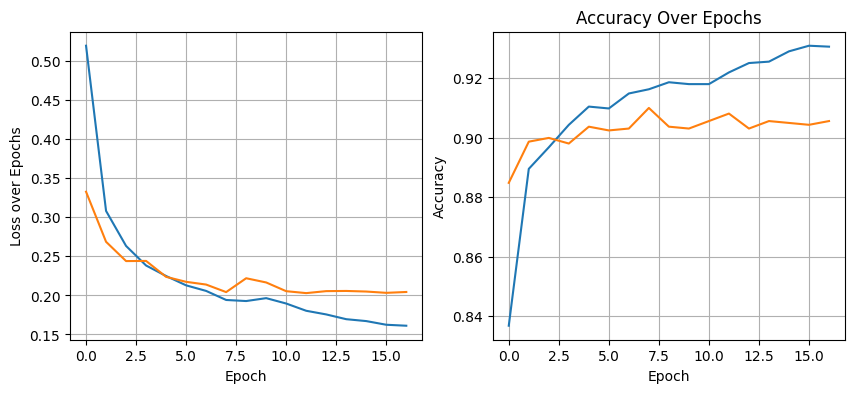

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 361us/step - accuracy: 0.9099 - loss: 0.1884
128 nodes, dropout 0.2, lr 0.001, batch size 32


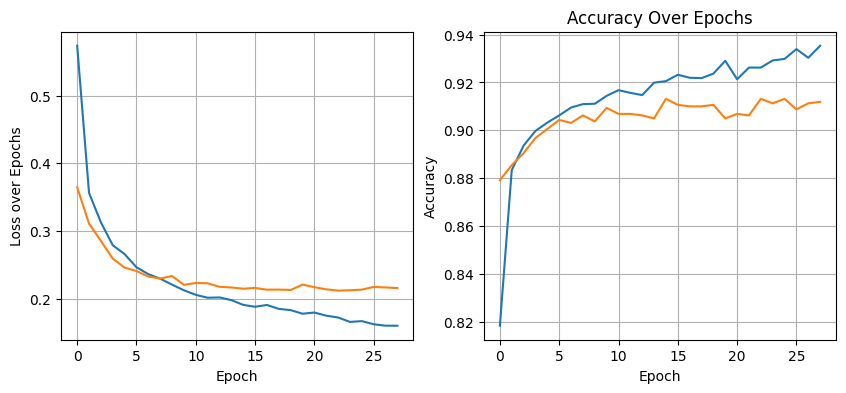

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 393us/step - accuracy: 0.9120 - loss: 0.1950
128 nodes, dropout 0.2, lr 0.001, batch size 64


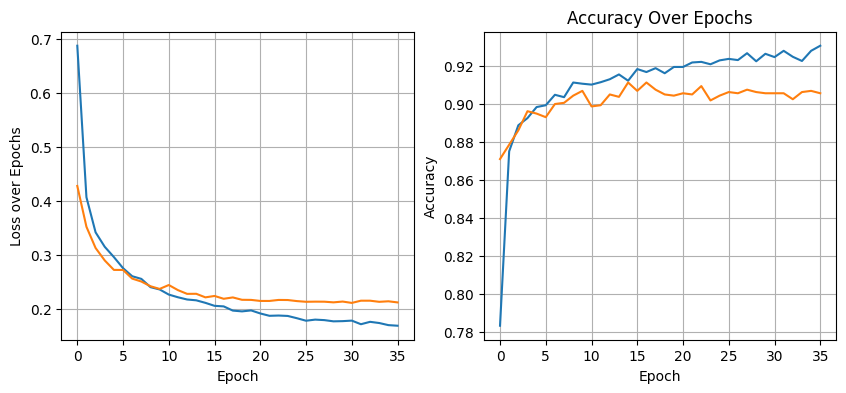

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 362us/step - accuracy: 0.9080 - loss: 0.2007
128 nodes, dropout 0.2, lr 0.001, batch size 128


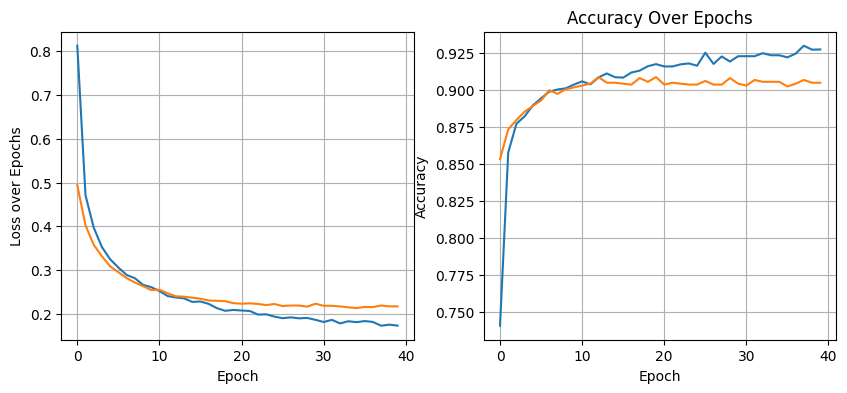

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 363us/step - accuracy: 0.9121 - loss: 0.1939
256 nodes, dropout 0, lr 0.01, batch size 32


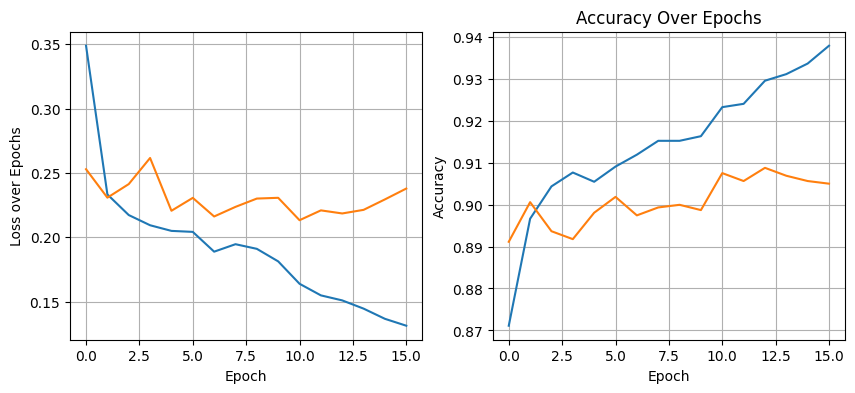

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 495us/step - accuracy: 0.9101 - loss: 0.1907
256 nodes, dropout 0, lr 0.01, batch size 64


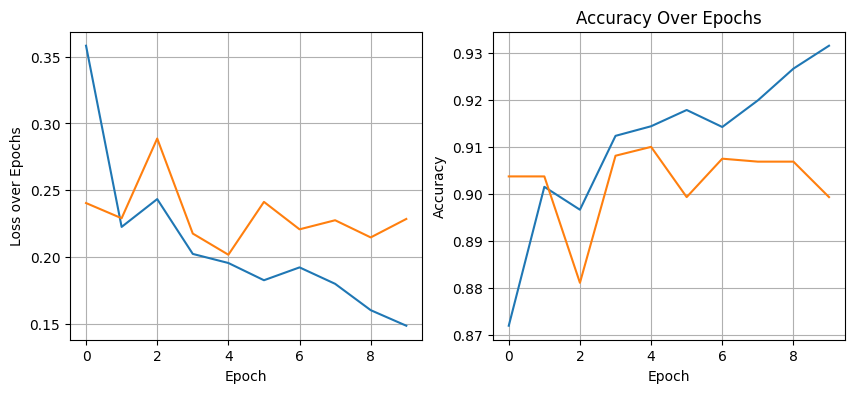

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 446us/step - accuracy: 0.9026 - loss: 0.1982
256 nodes, dropout 0, lr 0.01, batch size 128


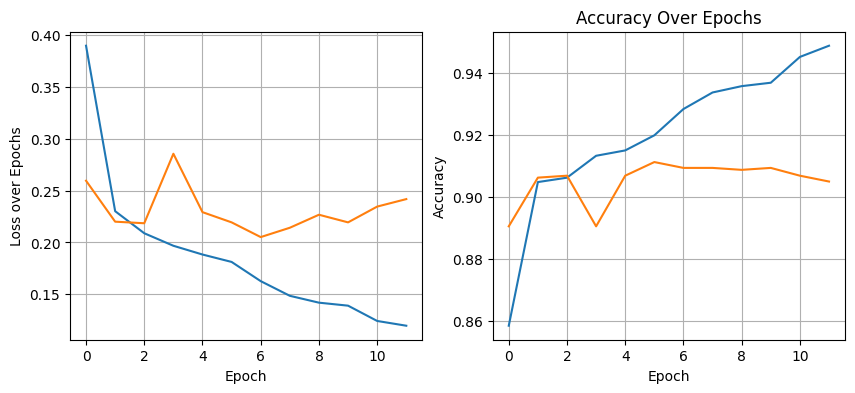

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 417us/step - accuracy: 0.9142 - loss: 0.1845
256 nodes, dropout 0, lr 0.005, batch size 32


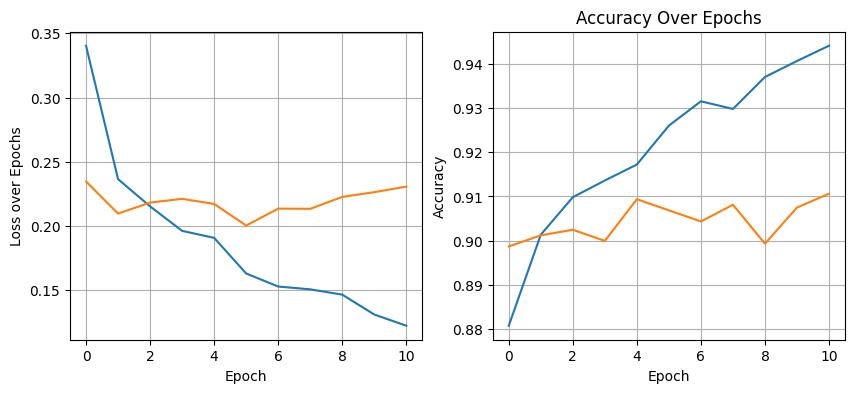

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 451us/step - accuracy: 0.9185 - loss: 0.1787
256 nodes, dropout 0, lr 0.005, batch size 64


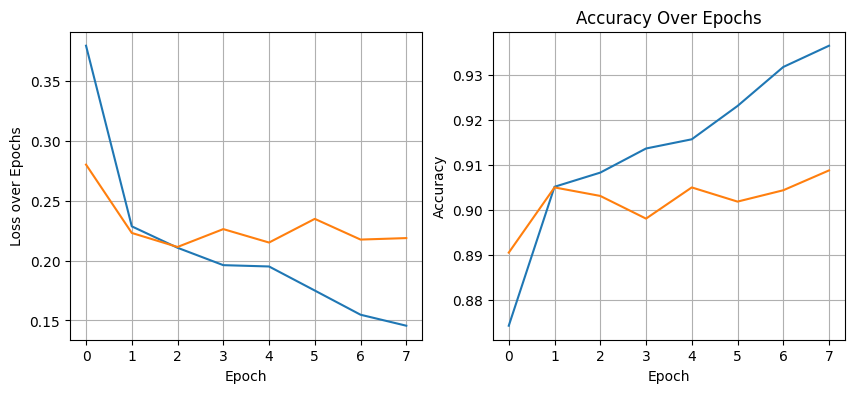

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 445us/step - accuracy: 0.9081 - loss: 0.1937
256 nodes, dropout 0, lr 0.005, batch size 128


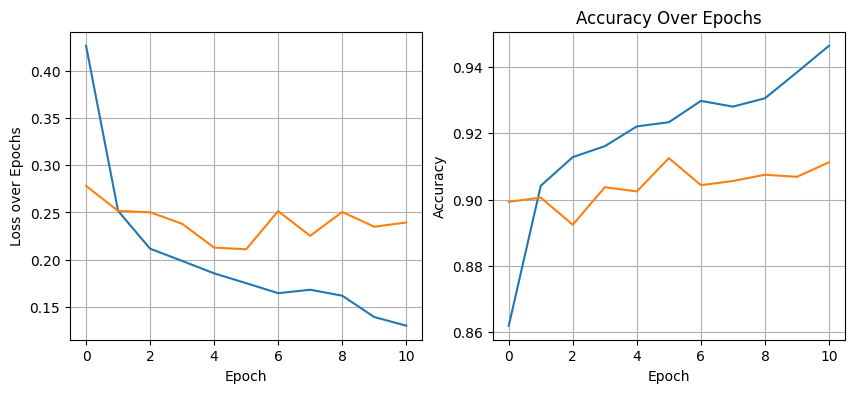

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 450us/step - accuracy: 0.9099 - loss: 0.2018
256 nodes, dropout 0, lr 0.001, batch size 32


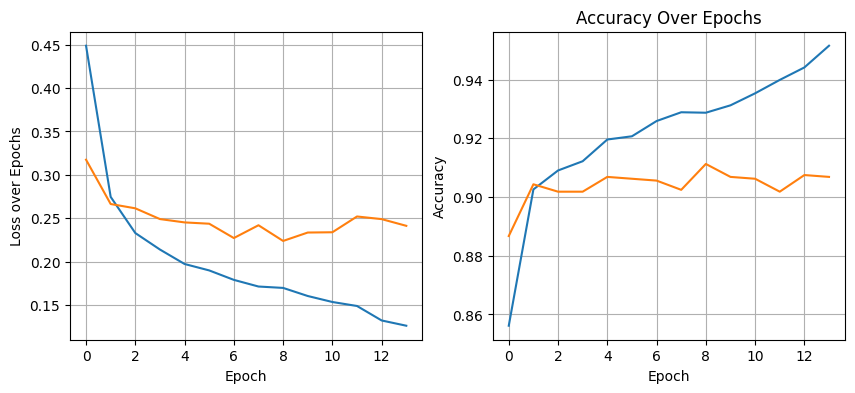

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step - accuracy: 0.9091 - loss: 0.2113
256 nodes, dropout 0, lr 0.001, batch size 64


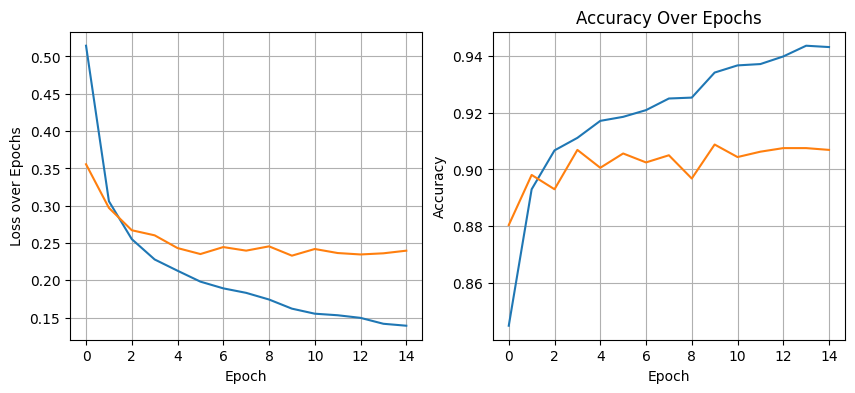

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 420us/step - accuracy: 0.9104 - loss: 0.2048
256 nodes, dropout 0, lr 0.001, batch size 128


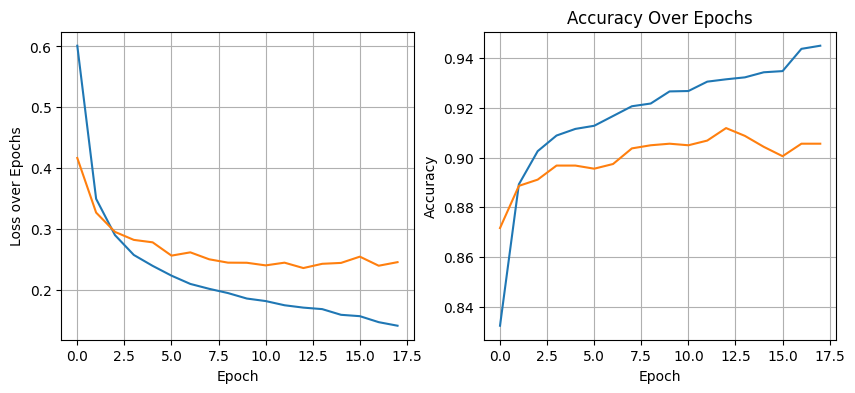

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 426us/step - accuracy: 0.9113 - loss: 0.2105
256 nodes, dropout 0.2, lr 0.01, batch size 32


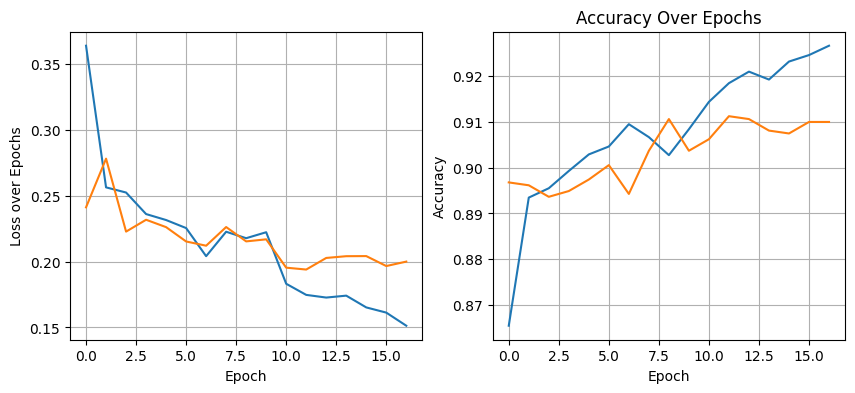

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 744us/step - accuracy: 0.9088 - loss: 0.1838
256 nodes, dropout 0.2, lr 0.01, batch size 64


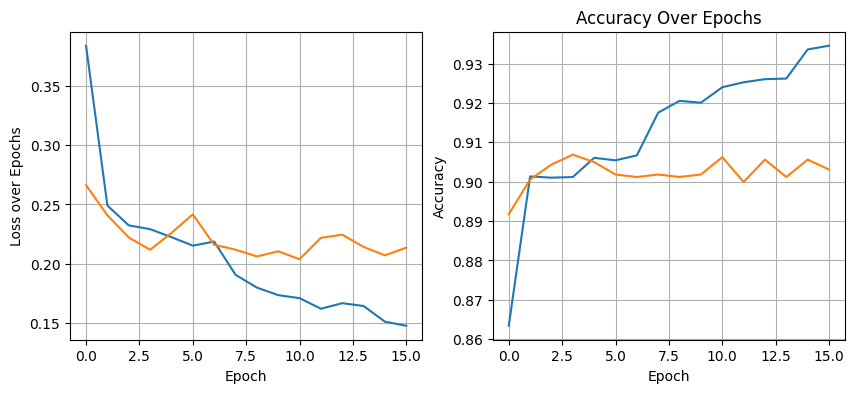

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 511us/step - accuracy: 0.9115 - loss: 0.1851
256 nodes, dropout 0.2, lr 0.01, batch size 128


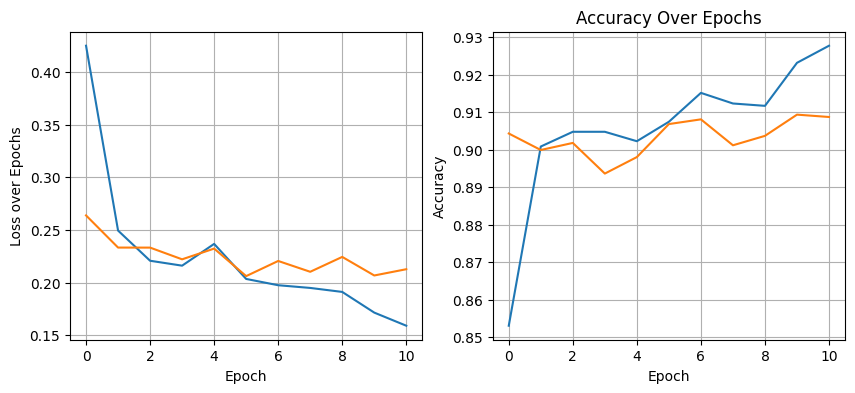

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.9137 - loss: 0.1908
256 nodes, dropout 0.2, lr 0.005, batch size 32


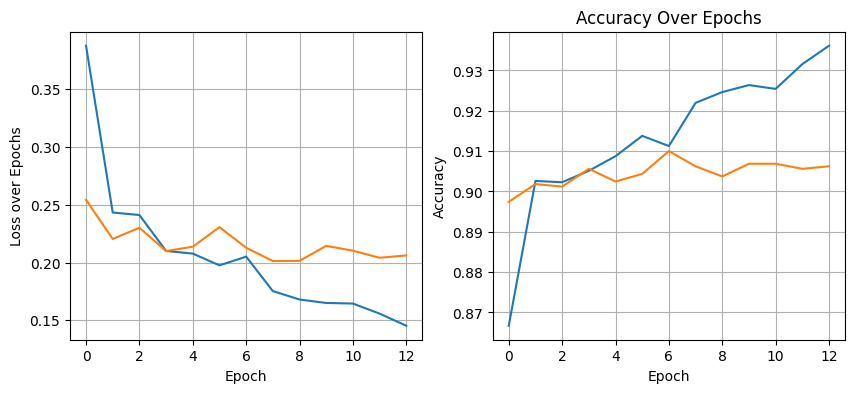

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 860us/step - accuracy: 0.9109 - loss: 0.1831
256 nodes, dropout 0.2, lr 0.005, batch size 64


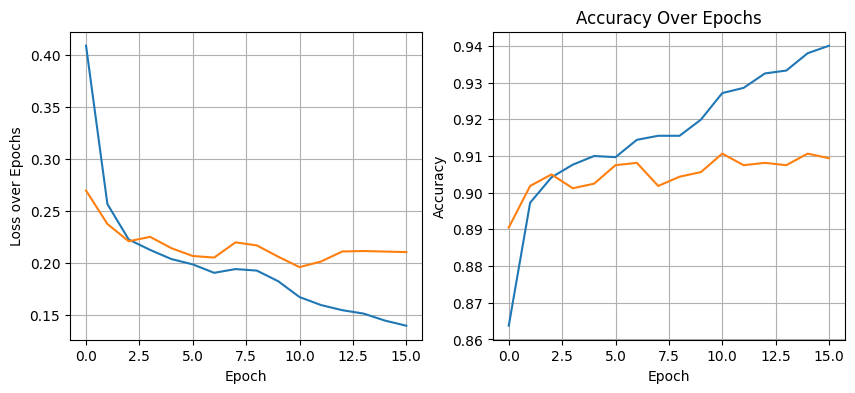

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 545us/step - accuracy: 0.9152 - loss: 0.1808
256 nodes, dropout 0.2, lr 0.005, batch size 128


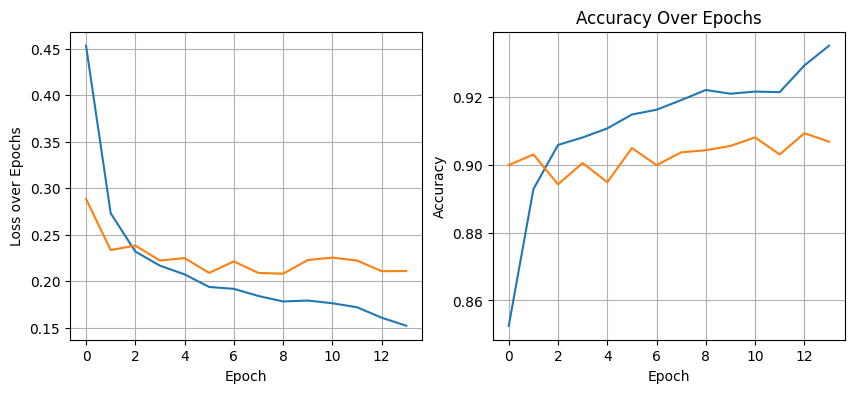

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 418us/step - accuracy: 0.9051 - loss: 0.1896
256 nodes, dropout 0.2, lr 0.001, batch size 32


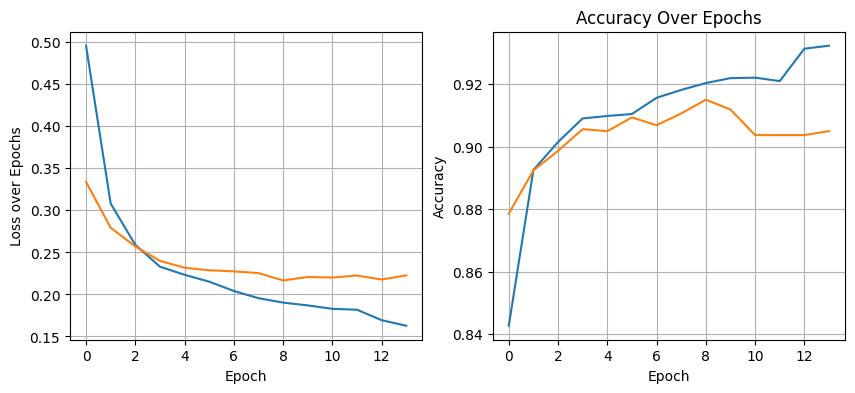

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 639us/step - accuracy: 0.9088 - loss: 0.1984
256 nodes, dropout 0.2, lr 0.001, batch size 64


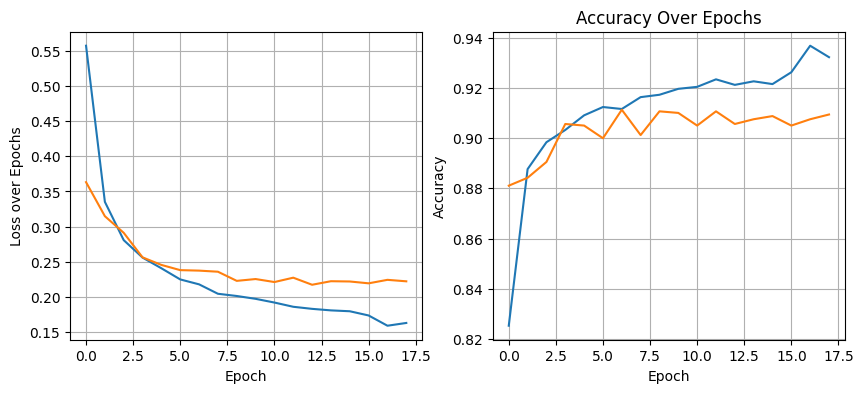

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 402us/step - accuracy: 0.9076 - loss: 0.2009
256 nodes, dropout 0.2, lr 0.001, batch size 128


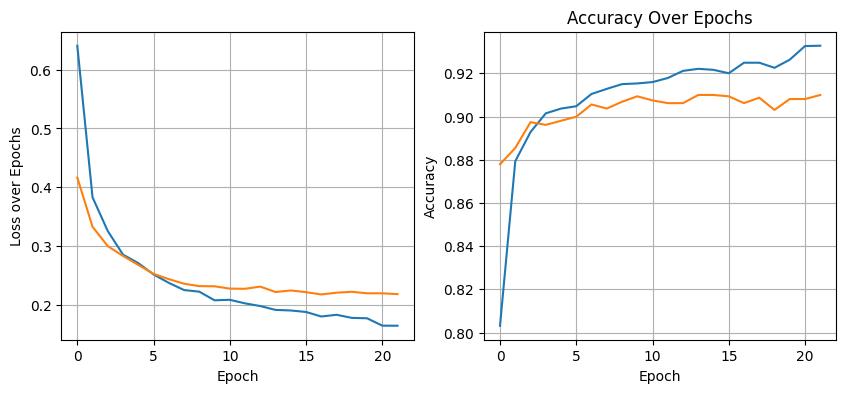

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 468us/step - accuracy: 0.9107 - loss: 0.2004
512 nodes, dropout 0, lr 0.01, batch size 32


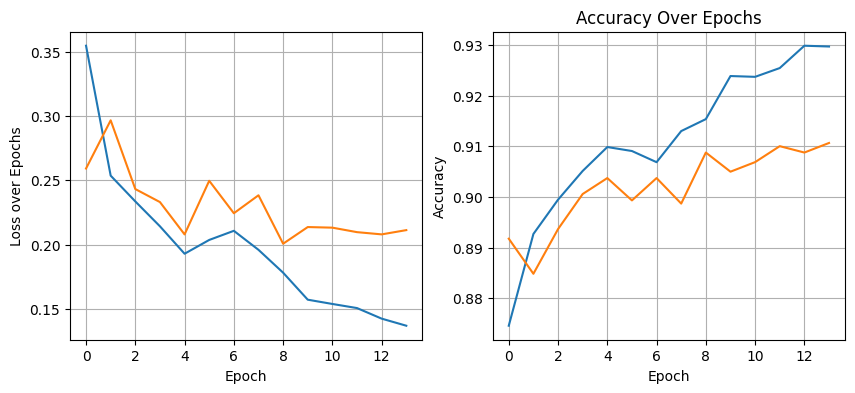

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 899us/step - accuracy: 0.9057 - loss: 0.1845
512 nodes, dropout 0, lr 0.01, batch size 64


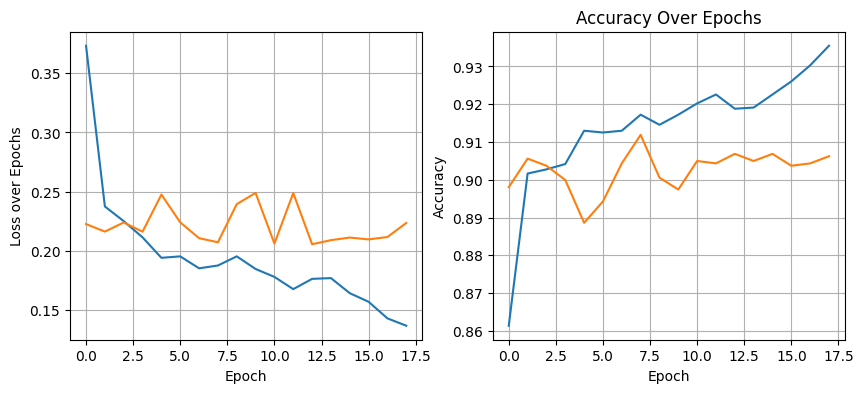

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step - accuracy: 0.9095 - loss: 0.1855
512 nodes, dropout 0, lr 0.01, batch size 128


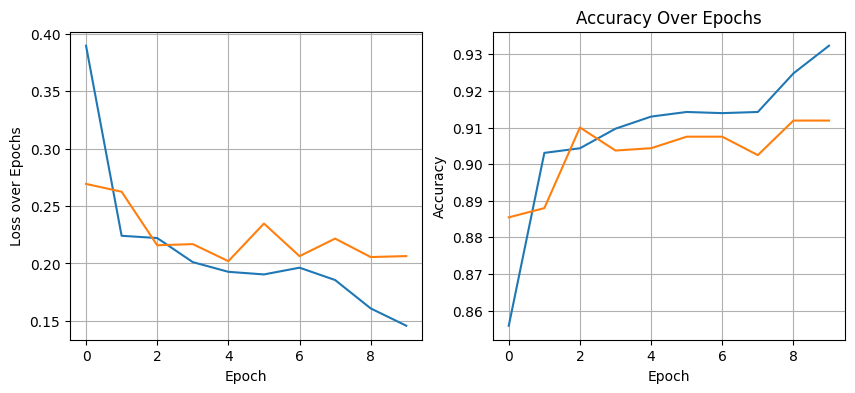

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step - accuracy: 0.9084 - loss: 0.1870
512 nodes, dropout 0, lr 0.005, batch size 32


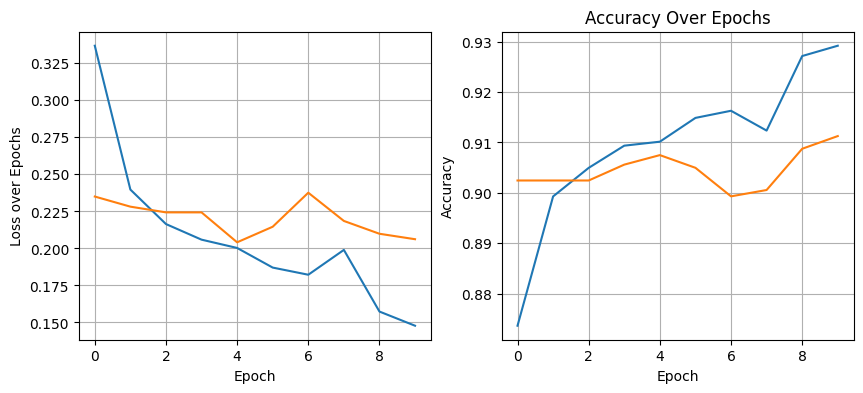

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 748us/step - accuracy: 0.9127 - loss: 0.1798
512 nodes, dropout 0, lr 0.005, batch size 64


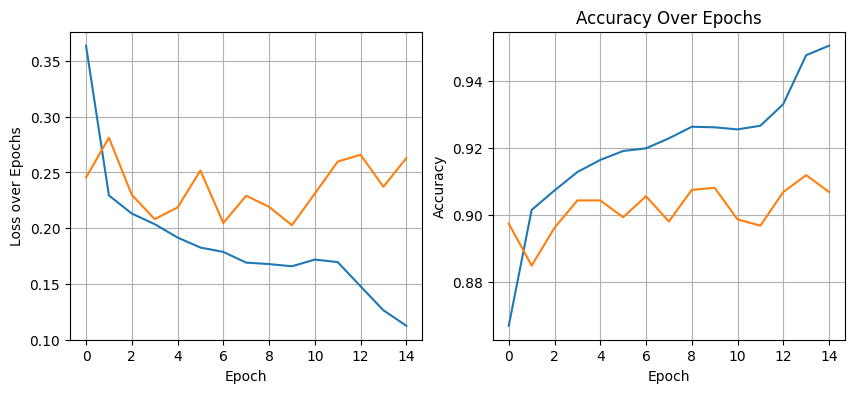

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 593us/step - accuracy: 0.9137 - loss: 0.1927
512 nodes, dropout 0, lr 0.005, batch size 128


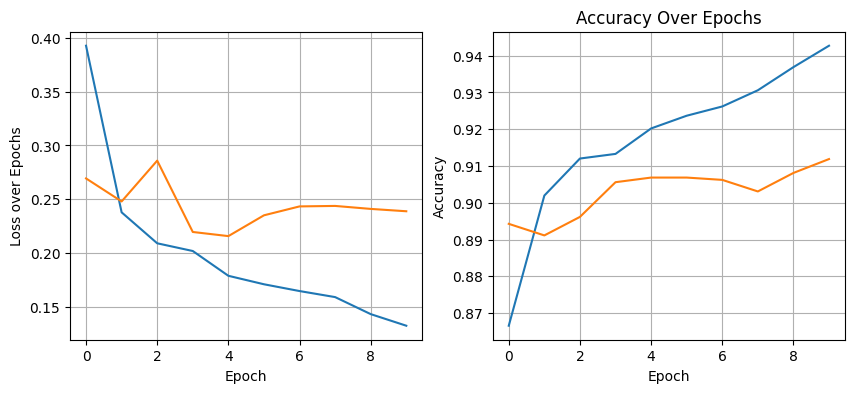

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 627us/step - accuracy: 0.9064 - loss: 0.2003
512 nodes, dropout 0, lr 0.001, batch size 32


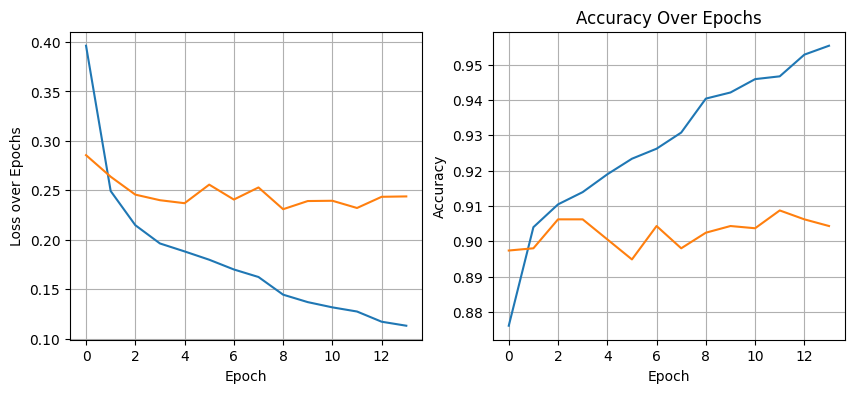

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9029 - loss: 0.2202
512 nodes, dropout 0, lr 0.001, batch size 64


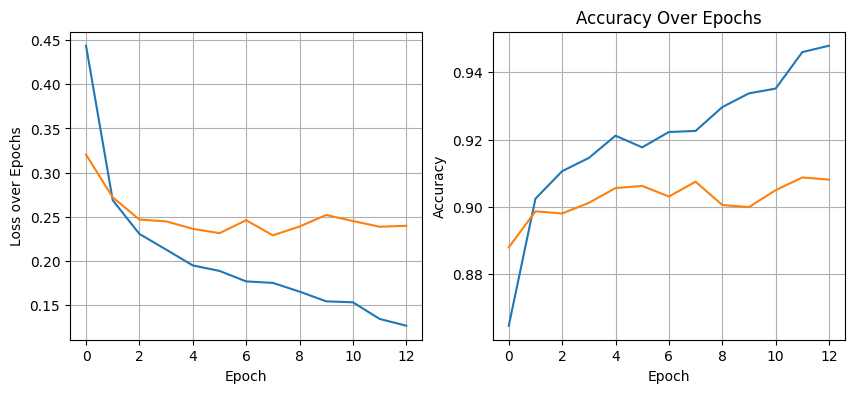

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 658us/step - accuracy: 0.9095 - loss: 0.2026
512 nodes, dropout 0, lr 0.001, batch size 128


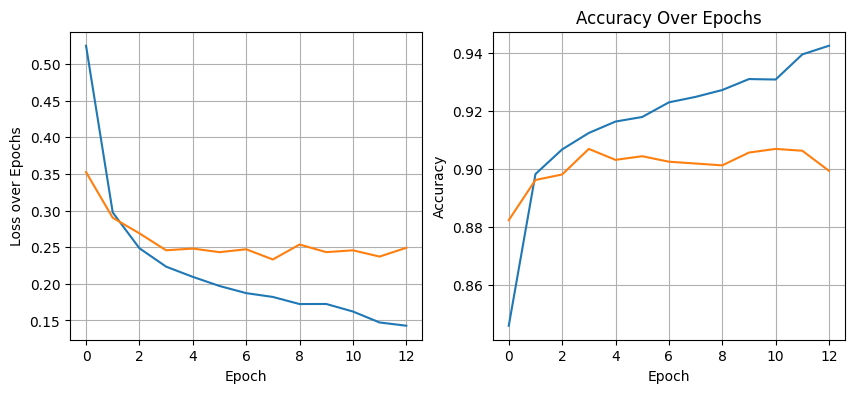

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 646us/step - accuracy: 0.9065 - loss: 0.2111
512 nodes, dropout 0.2, lr 0.01, batch size 32


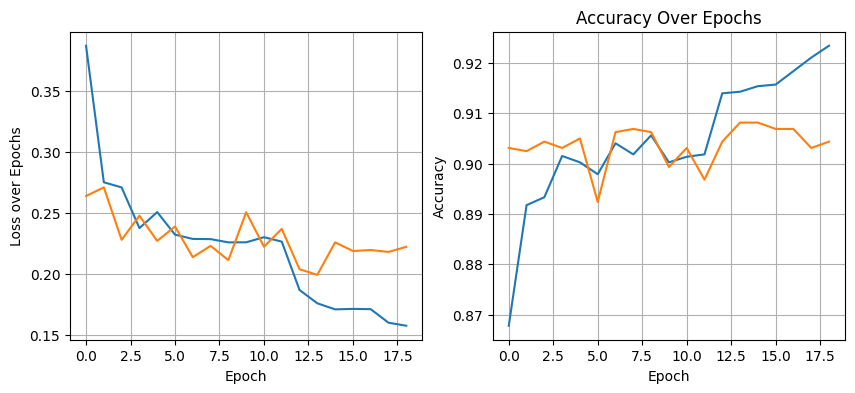

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 701us/step - accuracy: 0.9052 - loss: 0.1848
512 nodes, dropout 0.2, lr 0.01, batch size 64


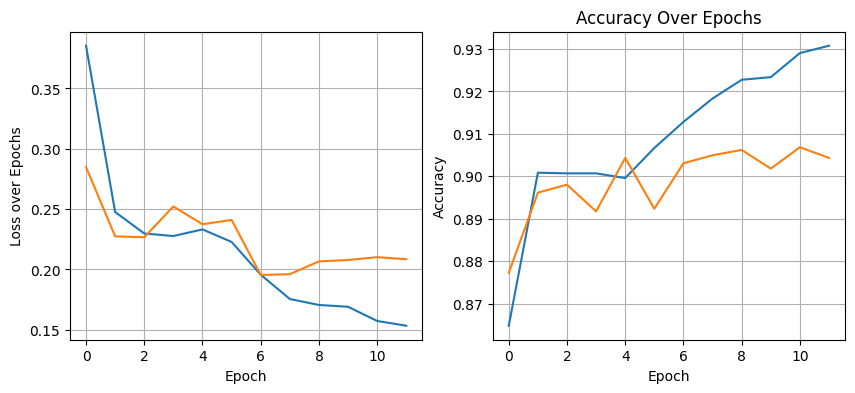

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step - accuracy: 0.9083 - loss: 0.1826
512 nodes, dropout 0.2, lr 0.01, batch size 128


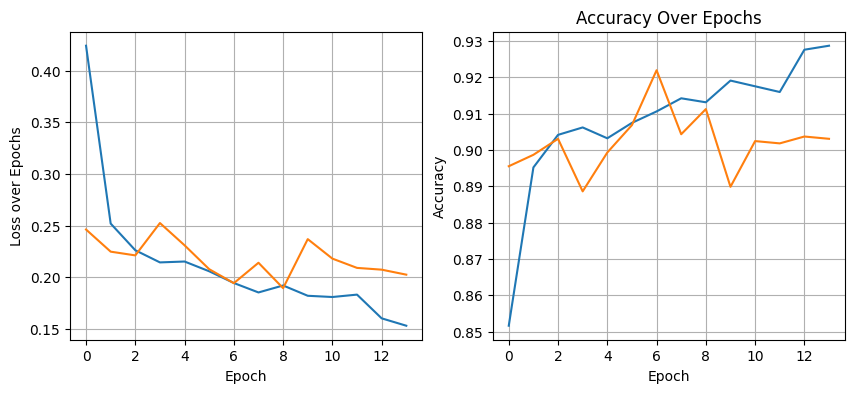

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 663us/step - accuracy: 0.9124 - loss: 0.1779
512 nodes, dropout 0.2, lr 0.005, batch size 32


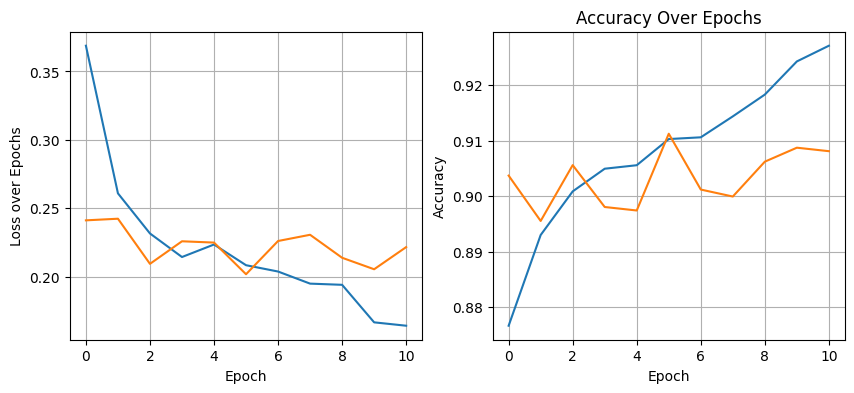

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - accuracy: 0.9150 - loss: 0.1851
512 nodes, dropout 0.2, lr 0.005, batch size 64


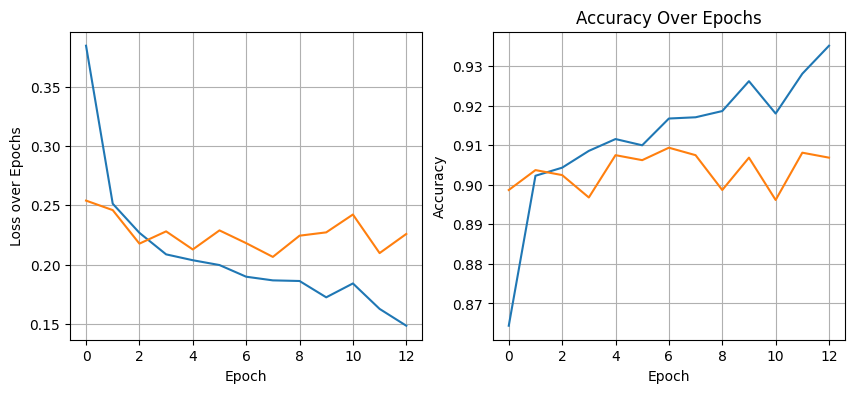

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 800us/step - accuracy: 0.9070 - loss: 0.1907
512 nodes, dropout 0.2, lr 0.005, batch size 128


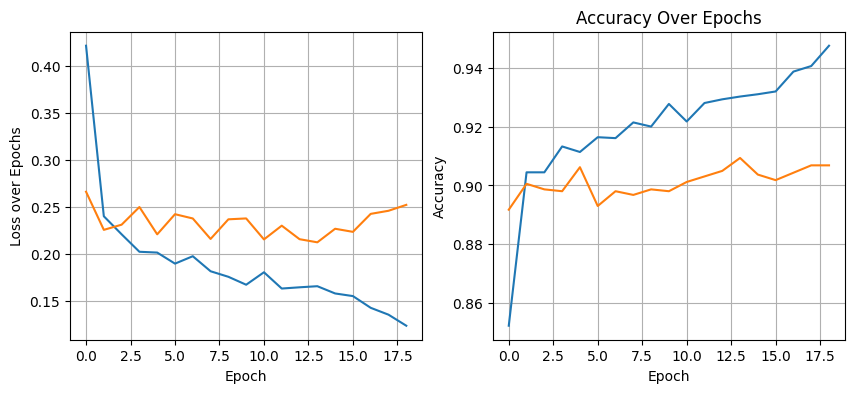

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 740us/step - accuracy: 0.9098 - loss: 0.1988
512 nodes, dropout 0.2, lr 0.001, batch size 32


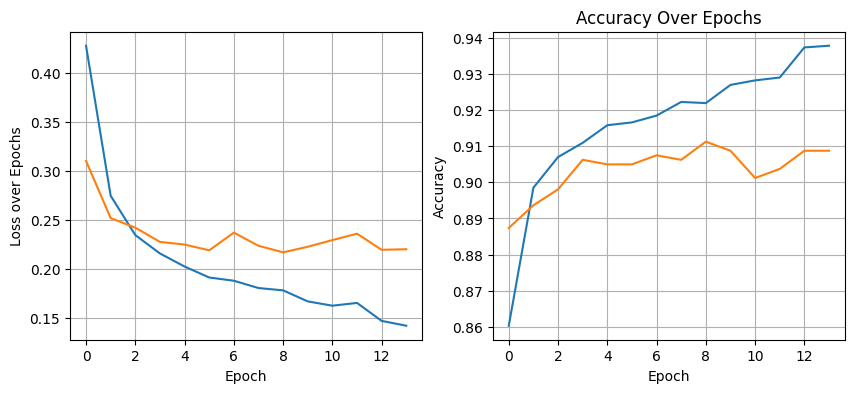

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 700us/step - accuracy: 0.9137 - loss: 0.1960
512 nodes, dropout 0.2, lr 0.001, batch size 64


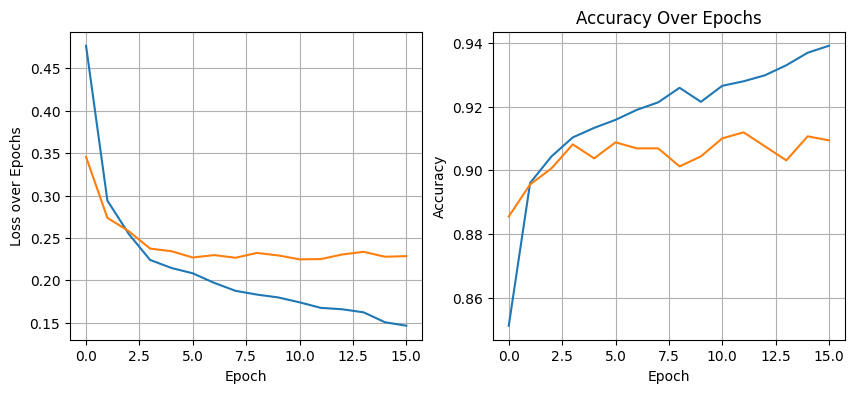

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 808us/step - accuracy: 0.9084 - loss: 0.2010
512 nodes, dropout 0.2, lr 0.001, batch size 128


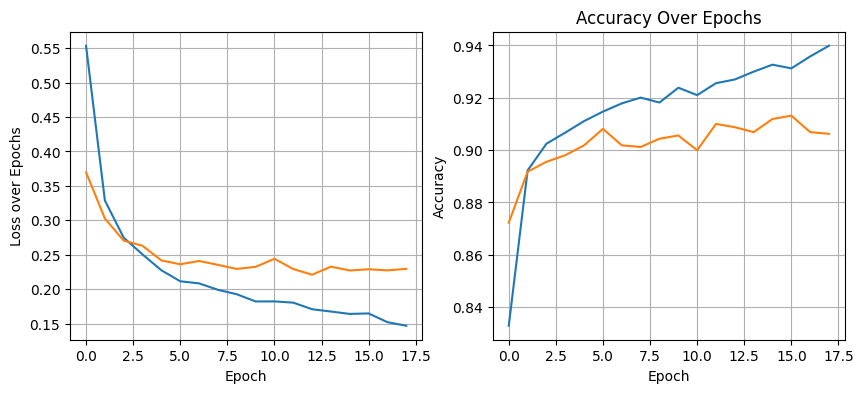

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 588us/step - accuracy: 0.9095 - loss: 0.2083


In [81]:
least_val_loss = float('inf')
least_loss_model = None
epochs=100
for num_nodes in [128, 256, 512]:
  for dropout_prob in[0, 0.2]:
    for lr in [0.01, 0.005, 0.001]:
      for batch_size in [32, 64, 128]:
        print(f"{num_nodes} nodes, dropout {dropout_prob}, lr {lr}, batch size {batch_size}")
        model, history = trainModel(X_train, y_train, num_nodes, dropout_prob, lr, batch_size, epochs)
        plotHistory(history)
        val_loss = model.evaluate(X_valid, y_valid)[0]
        if val_loss < least_val_loss:
          least_val_loss = val_loss
          least_loss_model = model

In [82]:
y_pred = least_loss_model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

83/83 ━━━━━━━━━━━━━━━━━━━━ 0s 481us/step


In [83]:
print(y_pred)
print(y_test)

[1 1 2 ... 0 0 1]
[1 1 2 ... 0 0 1]


In [84]:
print(classification_report(y_test, y_pred,  digits=4))

              precision    recall  f1-score   support

           0     0.8622    0.9102    0.8855       646
           1     0.9029    0.9140    0.9084       651
           2     0.9484    0.9294    0.9388       652
           3     0.9227    0.8813    0.9016       691

    accuracy                         0.9083      2640
   macro avg     0.9090    0.9087    0.9086      2640
weighted avg     0.9093    0.9083    0.9085      2640



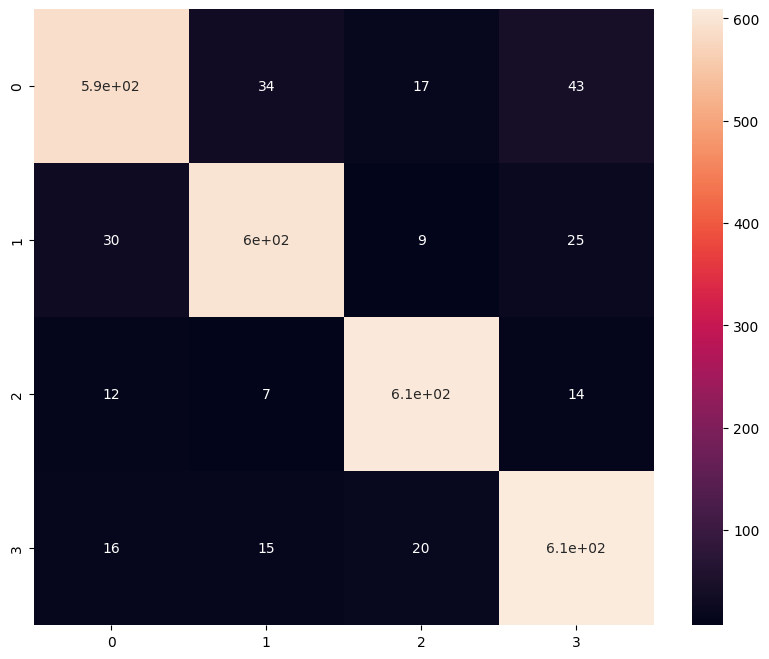

In [85]:
plt.figure(figsize=[10, 8])
sns.heatmap(confusion_matrix(y_pred, y_test), annot=True)
plt.show()

# Conclusion
Highest accuracy was found in the Random Forest Classifier for this dataset.